In [1]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns



# Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint




In [2]:

# Start a new run within the experiment
mlflow.start_run()


<ActiveRun: >

<ActiveRun: >

In [3]:

def read_data(file_path):
    try:
        data = pd.read_excel(file_path)
        return data
    except Exception as e:
        print(f"Failed to read data from {file_path}: {str(e)}")
        return None


In [4]:

excel_path = "C:/Users/sbittoun/Downloads/heart2.csv"
data = pd.read_csv(excel_path)


if data is not None:
        print("Data read successfully.")
        # Example: display the first few rows of the filtered data
        #print(data.head(5))

        X = data.drop("HeartDiseaseorAttack", axis=1)  # Features
        y = data["HeartDiseaseorAttack"]  # Target column

        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


        # Créer et entraîner le modèle Random Forest
        model = RandomForestClassifier()        
        model.fit(train_X, train_y)
        predictions = model.predict(test_X)

        r2 = r2_score(test_y, predictions)
        rmse = mean_squared_error(test_y, predictions, squared=False)
        mae = mean_absolute_error(test_y, predictions)



        #print(train_y, "\n\n")
        print(test_y, "\n\n")
        print(test_X,"\n\n")
        print(predictions,"\n\n")
        
        
        # should be close to 1
        print("r2: ", r2, "\n")

        # should be close to 0
        print("mae: ", mae, "\n")

        # should be close to 0
        print("rmse: ", rmse, "\n")
        
else:
    print("Failed to read data.")


Data read successfully.
Data read successfully.
219620    0
132821    0
151862    0
139717    0
239235    0
         ..
169513    0
182415    0
109739    0
181671    0
202118    0
Name: HeartDiseaseorAttack, Length: 50736, dtype: int64 


        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  Diabetes  \
219620       0         0          1   21       0       0         0   
132821       1         1          1   28       0       0         0   
151862       0         0          1   24       0       0         0   
139717       0         0          1   27       1       0         0   
239235       0         1          1   31       1       0         0   
...        ...       ...        ...  ...     ...     ...       ...   
169513       1         0          1   29       1       0         2   
182415       0         0          1   25       0       0         0   
109739       0         1          1   28       0       0         0   
181671       0         0          1   24       1       0     

In [5]:
############## COST AND LOSS FUNCTIONS #######################################################

# Calculer la fonction de coût (cost function) - log loss
cost = log_loss(test_y, predictions, labels=np.unique(test_y))

# Calculer la fonction de perte (loss function) - mean absolute error
loss = mean_absolute_error(test_y, predictions)

# Afficher les valeurs de la fonction de coût et de la fonction de perte
print("Cost function:", cost)
print("Loss function:", loss)


Cost function: 3.473933007584021
Loss function: 0.09638126773888363
Cost function: 3.473933007584021
Loss function: 0.09638126773888363


Precision:  0.4510433386837881
Recall:  0.11786912751677853
Precision:  0.4510433386837881
Recall:  0.11786912751677853


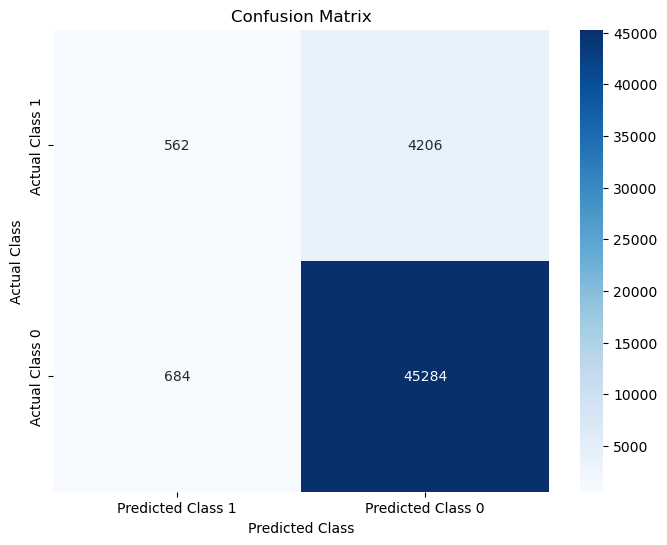

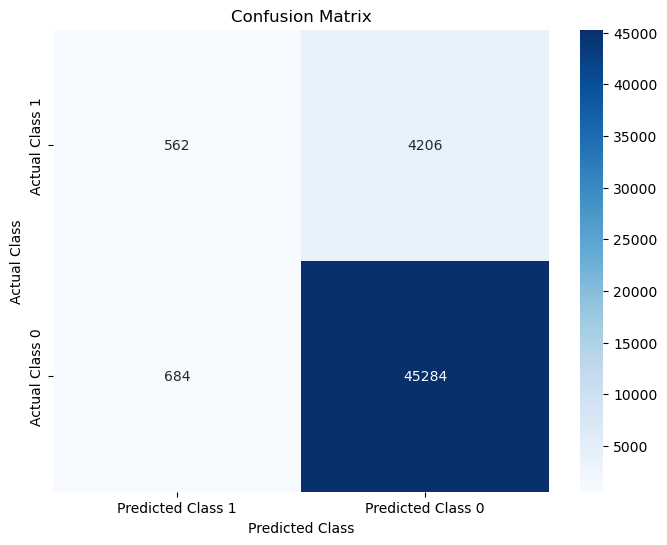

In [6]:
############################################### CONFUSION MATRIX, PRECISION, RECALL ####################################
        # Create the confusion matrix
cm = confusion_matrix(test_y, predictions)

# Inversion des positions des classes dans la matrice de confusion
inv_con = cm[::-1, ::-1]

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(inv_con, index=['Actual Class 1', 'Actual Class 0'], columns=['Predicted Class 1', 'Predicted Class 0'])



# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

'''
Precision = 45461 / (45461 + 4137) = 0.9165 (approximately)
Recall = 45461 / (45461 + 507) = 0.989 (approximately)
'''

# Calculate precision
precision = precision_score(test_y, predictions)

# Calculate recall
recall = recall_score(test_y, predictions)

print("Precision: ", precision)
print("Recall: ", recall)

##############################################################################################################################


In [7]:
################################################ MLFLOW METRICS #######################################################


#mlflow metrics
mlflow.log_metric("RMSE", rmse)
mlflow.log_metric("MAE", mae)
mlflow.log_metric("R2", r2)
mlflow.log_metric("precision", precision) #metric logging
#mlflow.sklearn.log_model(model, "model") #model logging


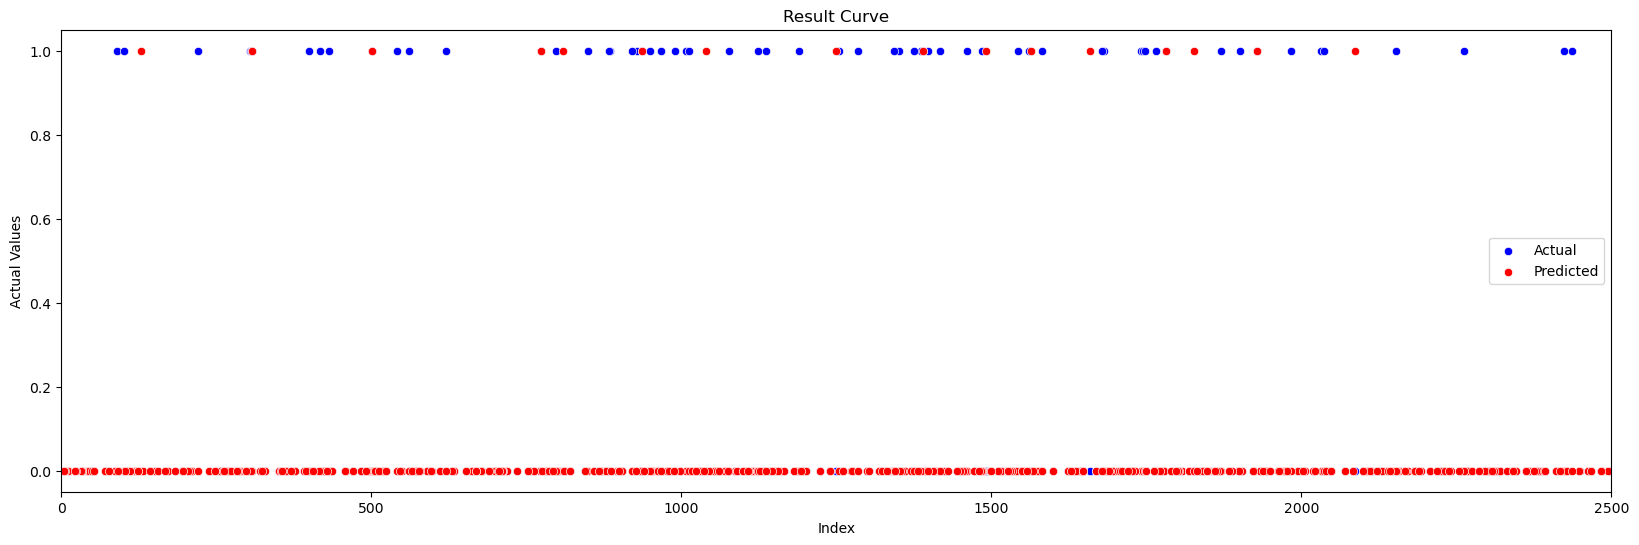

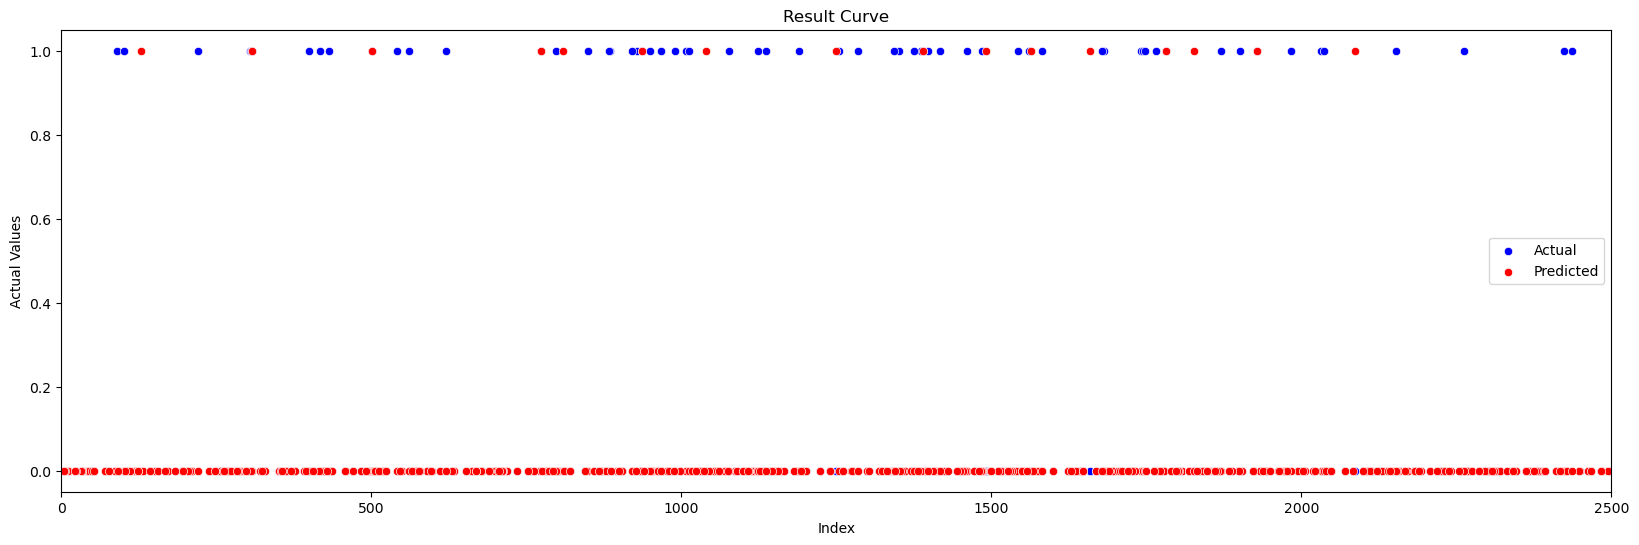

In [10]:
################################################## PLOTS ####################################################################
# Plot the actual values with a specific color
plt.figure(figsize=(20, 6))
sns.scatterplot(x=test_y.index, y=test_y, color='blue', label='Actual')
plt.xlabel('Index')
plt.ylabel('Actual Values')

# Plot the predicted values with a specific color
sns.scatterplot(x=test_y.index, y=predictions, color='red', label='Predicted')

plt.title('Result Curve')
plt.legend()

# Specify the start and end indices for the portion to display
start_index = 0
end_index = 2500

# Limit the x-axis to the specified portion
plt.xlim(start_index, end_index)

plt.show()


##############################################################################################################################

In [9]:

mlflow.end_run()
    

    

